In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

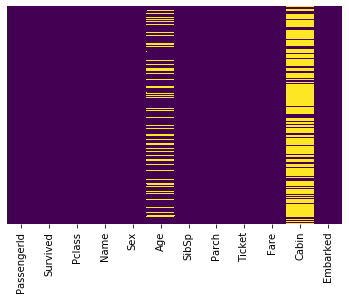

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

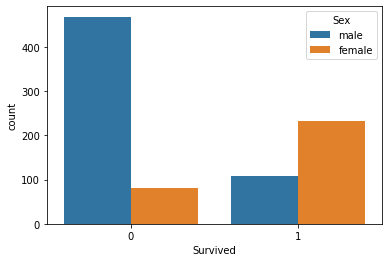

In [16]:
sns.countplot(train["Survived"],hue=train["Sex"])

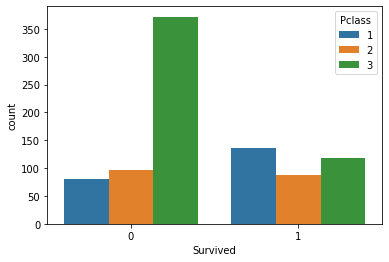

In [18]:
sns.countplot(train["Survived"],hue=train["Pclass"])

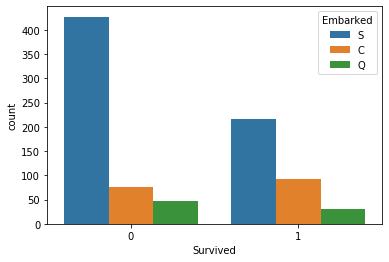

In [19]:
sns.countplot(train["Survived"],hue=train["Embarked"])

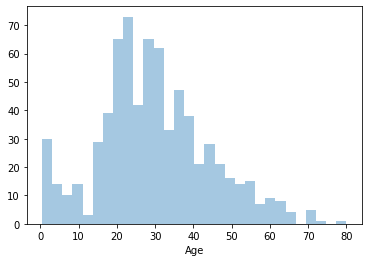

In [20]:
sns.distplot(train["Age"].dropna(),kde=False,bins=30)

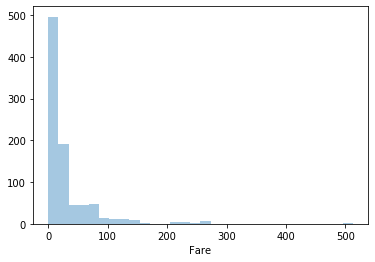

In [22]:
sns.distplot(train["Fare"],kde=False,bins=30)

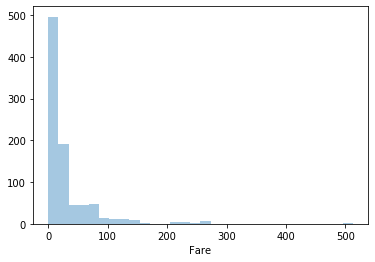

In [25]:
sns.distplot(train["Fare"],kde=False,bins=30)

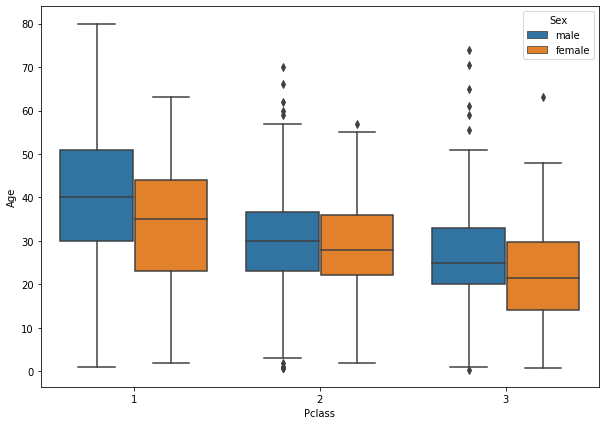

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",hue="Sex",data=train)

In [29]:
def fill_age(args):
    Age=args[0]
    Pclass=args[1]
    Sex=args[2]
    if pd.isnull(Age):
        if Pclass==1:
            if Sex=="male":
                return 40
            else:
                return 35
        elif Pclass==2:
            if Sex=="male":
                return 33
            else:
                return 30
        else :
            if Sex=="male":
                return 25
            else:
                return 21
    else:
        return Age

In [30]:
train["Age"]=train[["Age","Pclass","Sex"]].apply(fill_age,axis=1)

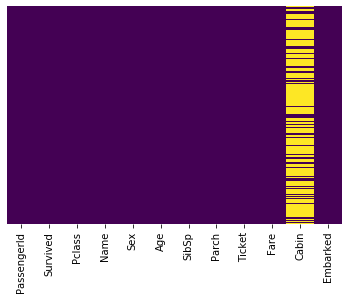

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [34]:
train.drop("Cabin",axis=1,inplace=True)

In [53]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
train.isnull().sum()


Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [39]:
train.dropna(inplace=True)

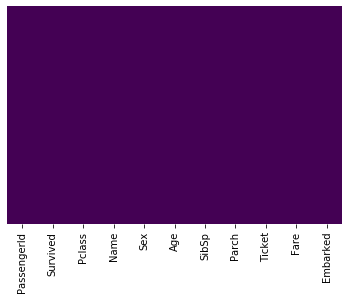

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")


In [41]:
sex=pd.get_dummies(train["Sex"],drop_first=True)
embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [43]:
train=pd.concat([train,sex,embark],axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [45]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [47]:
train.drop("PassengerId",axis=1,inplace=True)

In [79]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Test Analysis

In [83]:
test=pd.read_csv("titanic_test.csv")

In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [86]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

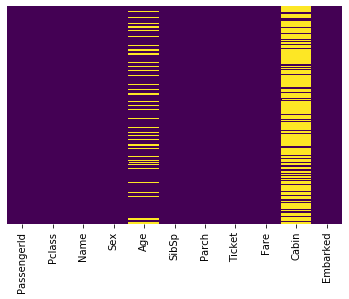

In [87]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

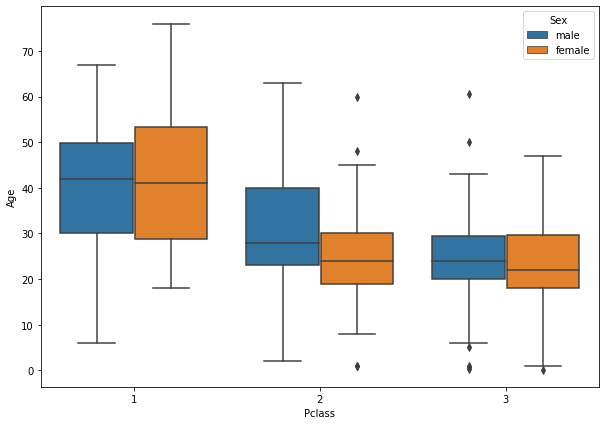

In [88]:
plt.figure(figsize=(10,7))
sns.boxplot(y="Age",x="Pclass",hue="Sex",data=test)

In [89]:
def fill_age_test(args):
    Age=args[0]
    Pclass=args[1]
    Sex=args[2]
    if pd.isnull(Age):
        if Pclass==1:
            if Sex=="male":
                return 42
            else:
                return 41
        elif Pclass==2:
            if Sex=="male":
                return 28
            else:
                return 25
        else :
            if Sex=="male":
                return 25
            else:
                return 23
    else:
        return Age

In [90]:
test["Age"]=test[["Age","Pclass","Sex"]].apply(fill_age,axis=1)

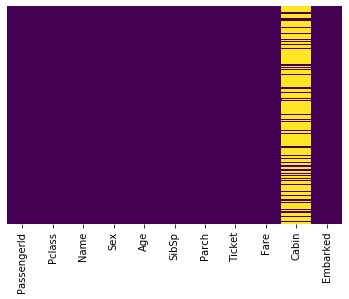

In [91]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [92]:
test.drop("Cabin",axis=1,inplace=True)


In [93]:
test.dropna(inplace=True)

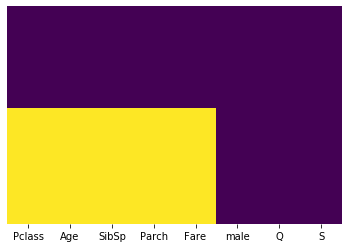

In [106]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [95]:
sex_test=pd.get_dummies(test["Sex"],drop_first=True)
embark_test=pd.get_dummies(test["Embarked"],drop_first=True)

In [96]:
test=pd.concat([test,sex,embark],axis=1)

In [101]:
test.drop(["Embarked","Name","Ticket"],axis=1,inplace=True)

In [99]:
test.drop("Sex",axis=1,inplace=True)

In [104]:
test.drop("PassengerId",axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,34.5,0.0,0.0,7.8292,1.0,0.0,1.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,1.0


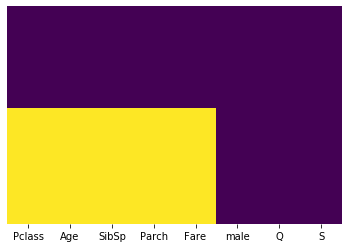

In [105]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [108]:
test.dropna(inplace=True)

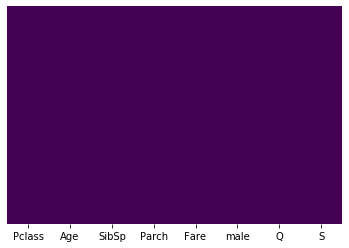

In [109]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  416 non-null    float64
 1   Age     416 non-null    float64
 2   SibSp   416 non-null    float64
 3   Parch   416 non-null    float64
 4   Fare    416 non-null    float64
 5   male    416 non-null    float64
 6   Q       416 non-null    float64
 7   S       416 non-null    float64
dtypes: float64(8)
memory usage: 29.2 KB


In [111]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,34.5,0.0,0.0,7.8292,1.0,0.0,1.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,1.0


In [112]:
full=pd.concat([train,test])

In [125]:
X=train.drop("Survived",axis=1)
y=train["Survived"]

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
predictions = LogisticRegression.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[157,  27],
       [ 26,  84]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       184
           1       0.76      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.82      0.82      0.82       294



In [147]:
pred=LogisticRegression.predict(test)
test["Survived"]=pred

In [148]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3.0,34.5,0.0,0.0,7.8292,1.0,0.0,1.0,0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0,0
2,2.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0,0
3,3.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,1.0,0


In [156]:
A=test.drop("Survived",axis=1)
b=test["Survived"]

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=42)

In [157]:
LogisticRegression.fit(A_train,b_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predict=LogisticRegression.predict(A_test)

In [159]:
predict

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0], dtype=int64)

In [160]:
print(classification_report(b_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        73
           1       0.95      0.92      0.94        65

    accuracy                           0.94       138
   macro avg       0.94      0.94      0.94       138
weighted avg       0.94      0.94      0.94       138



In [161]:
confusion_matrix(b_test,predict)

array([[70,  3],
       [ 5, 60]], dtype=int64)